# Playlist Creation via Spotify Audio Features Classification
This is an example notebook that uses the SpotifyFeatPlaylist script to create an ensemble model that uses audio features as input and popularity as the target variable
to ultimately create a playlist with similar audio features.

In [2]:
import config
import SpotFeatPlaylist as spa
import glob
import pandas as pd

Get stream history metadata from Spotify and get user client id and secret for Spotify Web API to access Spotify music data

In [3]:
cid = config.API_CID
secret = config.API_SECRET
stream_data = glob.glob("./*Audio*.json")

sdata = spa.SpotifyAudioAnalysis(cid, secret)

df = sdata.to_pandasdf(stream_data)

In [ ]:
df

,master_metadata_track_name,master_metadata_album_artist_name,spotify_track_uri
0,Kaktüs,Norm Ender,spotify:track:4xDLgHEIa8RHwEbXMkxT7l
1,Benim Derdim,Ezhel,spotify:track:3RCy0AV1CKCF2h7IAvjfpU
2,Yalanlar,Aga B,spotify:track:4TV5415yZ3fIFasqfFLbHN
3,Soygun,Tepki,spotify:track:4Ohsjd3wz5ZuI21HCKZ5e6
4,Şehrimin Tadı,Ezhel,spotify:track:5JaXKUIcNxwSuUyD4CsphL
...,...,...,...
539,The Perfect Girl,Mareux,spotify:track:5RBOcBpJXaNnHCGViJmYhh
540,GigaChad Theme - Phonk House Version,g3ox_em,spotify:track:7mLWNwcvwRdEviz6SfYp8A
541,The Beautiful People,Marilyn Manson,spotify:track:2aIB1CdRRG7YLBu9hNw9nR
542,The Beautiful People,Marilyn Manson,spotify:track:2aIB1CdRRG7YLBu9hNw9nR


In [ ]:
df_pop = sdata.create_popularity(df, 250)
df_pop

,master_metadata_track_name,master_metadata_album_artist_name,spotify_track_uri,track_artist,track_listen_count,popularity
0,Şehrimin Tadı,Ezhel,spotify:track:5JaXKUIcNxwSuUyD4CsphL,Şehrimin Tadı - Ezhel,39,1
1,Geceler,Ezhel,spotify:track:0R0o8uOkDz40XsR6uwThfQ,Geceler - Ezhel,55,1
2,Mono,Courtney Love,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,Mono - Courtney Love,72,1
3,Kazıdık Tırnaklarla,Ezhel,spotify:track:27OWNTEEtJCFVejrh5mqgv,Kazıdık Tırnaklarla - Ezhel,134,1
4,Mahallemiz Esmer,Ben Fero,spotify:track:3qOxkhNytyb6ifxNzxxULn,Mahallemiz Esmer - Ben Fero,98,1
...,...,...,...,...,...,...
495,Walk,Kyddiekafka,spotify:track:2cVKHQTLJbgs8TUqQXgVDU,Walk - Kyddiekafka,1,0
496,0% Angel,Mr.Kitty,spotify:track:0l2Ob0zMIQ21gJn642HyQ1,0% Angel - Mr.Kitty,1,0
497,Glitter,GRXGVR,spotify:track:7ogu6FZbymEdWuofKabkOu,Glitter - GRXGVR,1,0
498,One Step Closer,Linkin Park,spotify:track:3K4HG9evC7dg3N0R9cYqk4,One Step Closer - Linkin Park,1,0


Get genre data from Spotify API and add it to the df

In [ ]:
df_genre = sdata.create_genre(df_pop)

In [ ]:
df_genre.head()

,master_metadata_track_name,master_metadata_album_artist_name,spotify_track_uri,track_artist,track_listen_count,popularity,genre,track_uri
0,Şehrimin Tadı,Ezhel,spotify:track:5JaXKUIcNxwSuUyD4CsphL,Şehrimin Tadı - Ezhel,39,1,turkish hip hop,5JaXKUIcNxwSuUyD4CsphL
1,Geceler,Ezhel,spotify:track:0R0o8uOkDz40XsR6uwThfQ,Geceler - Ezhel,55,1,turkish hip hop,0R0o8uOkDz40XsR6uwThfQ
2,Mono,Courtney Love,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,Mono - Courtney Love,72,1,alternative rock,7zL1KgkpPb2Gi5Q2Inypl5
3,Kazıdık Tırnaklarla,Ezhel,spotify:track:27OWNTEEtJCFVejrh5mqgv,Kazıdık Tırnaklarla - Ezhel,134,1,turkish hip hop,27OWNTEEtJCFVejrh5mqgv
4,Mahallemiz Esmer,Ben Fero,spotify:track:3qOxkhNytyb6ifxNzxxULn,Mahallemiz Esmer - Ben Fero,98,1,turkce drill,3qOxkhNytyb6ifxNzxxULn


Lastly get audio features for the complete dataframe. This will take some time.<br>
We will save the dataframe and use it for further analyses

In [ ]:
df_audio = sdata.get_audio_features(df_genre, save_df=True)
df_audio.head()

HTTP Error for GET to https://api.spotify.com/v1/audio-analysis/56V9n2xZDsxX2pJO7qE5Re with Params: {} returned 404 due to analysis not found


Error processing track 56V9n2xZDsxX2pJO7qE5Re: http status: 404, code:-1 - https://api.spotify.com/v1/audio-analysis/56V9n2xZDsxX2pJO7qE5Re:
 analysis not found, reason: None


,master_metadata_track_name,master_metadata_album_artist_name,spotify_track_uri,track_artist,track_listen_count,popularity,genre,track_uri,mean_bar_duration,mean_pitches,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Şehrimin Tadı,Ezhel,spotify:track:5JaXKUIcNxwSuUyD4CsphL,Şehrimin Tadı - Ezhel,39,1,turkish hip hop,5JaXKUIcNxwSuUyD4CsphL,2.010277,0.383483,...,0.3220,0.302,125.055,audio_features,5JaXKUIcNxwSuUyD4CsphL,spotify:track:5JaXKUIcNxwSuUyD4CsphL,https://api.spotify.com/v1/tracks/5JaXKUIcNxwS...,https://api.spotify.com/v1/audio-analysis/5JaX...,253450.0,4.0
1,Geceler,Ezhel,spotify:track:0R0o8uOkDz40XsR6uwThfQ,Geceler - Ezhel,55,1,turkish hip hop,0R0o8uOkDz40XsR6uwThfQ,1.845690,0.346793,...,0.0939,0.339,130.020,audio_features,0R0o8uOkDz40XsR6uwThfQ,spotify:track:0R0o8uOkDz40XsR6uwThfQ,https://api.spotify.com/v1/tracks/0R0o8uOkDz40...,https://api.spotify.com/v1/audio-analysis/0R0o...,222928.0,4.0
2,Mono,Courtney Love,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,Mono - Courtney Love,72,1,alternative rock,7zL1KgkpPb2Gi5Q2Inypl5,1.527554,0.430793,...,0.3350,0.442,155.967,audio_features,7zL1KgkpPb2Gi5Q2Inypl5,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,https://api.spotify.com/v1/tracks/7zL1KgkpPb2G...,https://api.spotify.com/v1/audio-analysis/7zL1...,219693.0,4.0
3,Kazıdık Tırnaklarla,Ezhel,spotify:track:27OWNTEEtJCFVejrh5mqgv,Kazıdık Tırnaklarla - Ezhel,134,1,turkish hip hop,27OWNTEEtJCFVejrh5mqgv,1.718326,0.292124,...,0.0998,0.358,139.821,audio_features,27OWNTEEtJCFVejrh5mqgv,spotify:track:27OWNTEEtJCFVejrh5mqgv,https://api.spotify.com/v1/tracks/27OWNTEEtJCF...,https://api.spotify.com/v1/audio-analysis/27OW...,172609.0,4.0
4,Mahallemiz Esmer,Ben Fero,spotify:track:3qOxkhNytyb6ifxNzxxULn,Mahallemiz Esmer - Ben Fero,98,1,turkce drill,3qOxkhNytyb6ifxNzxxULn,1.675778,0.362264,...,0.0746,0.388,140.070,audio_features,3qOxkhNytyb6ifxNzxxULn,spotify:track:3qOxkhNytyb6ifxNzxxULn,https://api.spotify.com/v1/tracks/3qOxkhNytyb6...,https://api.spotify.com/v1/audio-analysis/3qOx...,226768.0,4.0


In [4]:
df_audio = pd.read_csv("./df_with_audio_features.csv")
df_audio

,master_metadata_track_name,master_metadata_album_artist_name,spotify_track_uri,track_artist,track_listen_count,popularity,genre,track_uri,mean_bar_duration,mean_pitches,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Şehrimin Tadı,Ezhel,spotify:track:5JaXKUIcNxwSuUyD4CsphL,Şehrimin Tadı - Ezhel,39,1,turkish hip hop,5JaXKUIcNxwSuUyD4CsphL,2.010277,0.383483,...,0.3220,0.3020,125.055,audio_features,5JaXKUIcNxwSuUyD4CsphL,spotify:track:5JaXKUIcNxwSuUyD4CsphL,https://api.spotify.com/v1/tracks/5JaXKUIcNxwS...,https://api.spotify.com/v1/audio-analysis/5JaX...,253450.0,4.0
1,Geceler,Ezhel,spotify:track:0R0o8uOkDz40XsR6uwThfQ,Geceler - Ezhel,55,1,turkish hip hop,0R0o8uOkDz40XsR6uwThfQ,1.845690,0.346793,...,0.0939,0.3390,130.020,audio_features,0R0o8uOkDz40XsR6uwThfQ,spotify:track:0R0o8uOkDz40XsR6uwThfQ,https://api.spotify.com/v1/tracks/0R0o8uOkDz40...,https://api.spotify.com/v1/audio-analysis/0R0o...,222928.0,4.0
2,Mono,Courtney Love,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,Mono - Courtney Love,72,1,alternative rock,7zL1KgkpPb2Gi5Q2Inypl5,1.527554,0.430793,...,0.3350,0.4420,155.967,audio_features,7zL1KgkpPb2Gi5Q2Inypl5,spotify:track:7zL1KgkpPb2Gi5Q2Inypl5,https://api.spotify.com/v1/tracks/7zL1KgkpPb2G...,https://api.spotify.com/v1/audio-analysis/7zL1...,219693.0,4.0
3,Kazıdık Tırnaklarla,Ezhel,spotify:track:27OWNTEEtJCFVejrh5mqgv,Kazıdık Tırnaklarla - Ezhel,134,1,turkish hip hop,27OWNTEEtJCFVejrh5mqgv,1.718326,0.292124,...,0.0998,0.3580,139.821,audio_features,27OWNTEEtJCFVejrh5mqgv,spotify:track:27OWNTEEtJCFVejrh5mqgv,https://api.spotify.com/v1/tracks/27OWNTEEtJCF...,https://api.spotify.com/v1/audio-analysis/27OW...,172609.0,4.0
4,Mahallemiz Esmer,Ben Fero,spotify:track:3qOxkhNytyb6ifxNzxxULn,Mahallemiz Esmer - Ben Fero,98,1,turkce drill,3qOxkhNytyb6ifxNzxxULn,1.675778,0.362264,...,0.0746,0.3880,140.070,audio_features,3qOxkhNytyb6ifxNzxxULn,spotify:track:3qOxkhNytyb6ifxNzxxULn,https://api.spotify.com/v1/tracks/3qOxkhNytyb6...,https://api.spotify.com/v1/audio-analysis/3qOx...,226768.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Walk,Kyddiekafka,spotify:track:2cVKHQTLJbgs8TUqQXgVDU,Walk - Kyddiekafka,1,0,wave,2cVKHQTLJbgs8TUqQXgVDU,1.773178,0.337286,...,0.1100,0.0849,135.026,audio_features,2cVKHQTLJbgs8TUqQXgVDU,spotify:track:2cVKHQTLJbgs8TUqQXgVDU,https://api.spotify.com/v1/tracks/2cVKHQTLJbgs...,https://api.spotify.com/v1/audio-analysis/2cVK...,173471.0,4.0
496,0% Angel,Mr.Kitty,spotify:track:0l2Ob0zMIQ21gJn642HyQ1,0% Angel - Mr.Kitty,1,0,weirdcore,0l2Ob0zMIQ21gJn642HyQ1,1.784976,0.355810,...,0.0797,0.7660,135.013,audio_features,0l2Ob0zMIQ21gJn642HyQ1,spotify:track:0l2Ob0zMIQ21gJn642HyQ1,https://api.spotify.com/v1/tracks/0l2Ob0zMIQ21...,https://api.spotify.com/v1/audio-analysis/0l2O...,234671.0,4.0
497,Glitter,GRXGVR,spotify:track:7ogu6FZbymEdWuofKabkOu,Glitter - GRXGVR,1,0,cloud rap,7ogu6FZbymEdWuofKabkOu,1.792892,0.227856,...,0.1120,0.1910,132.006,audio_features,7ogu6FZbymEdWuofKabkOu,spotify:track:7ogu6FZbymEdWuofKabkOu,https://api.spotify.com/v1/tracks/7ogu6FZbymEd...,https://api.spotify.com/v1/audio-analysis/7ogu...,136364.0,4.0
498,One Step Closer,Linkin Park,spotify:track:3K4HG9evC7dg3N0R9cYqk4,One Step Closer - Linkin Park,1,0,alternative metal,3K4HG9evC7dg3N0R9cYqk4,2.502925,0.402978,...,0.0787,0.5380,95.136,audio_features,3K4HG9evC7dg3N0R9cYqk4,spotify:track:3K4HG9evC7dg3N0R9cYqk4,https://api.spotify.com/v1/tracks/3K4HG9evC7dg...,https://api.spotify.com/v1/audio-analysis/3K4H...,157333.0,4.0


Drop any NaN samples

In [5]:
df_audio.dropna(inplace=True)
df_audio.reset_index(drop=True, inplace=True)

Instantiate plotting class to create various plots

In [ ]:
plotting = spa.CreatePlots(df_audio)

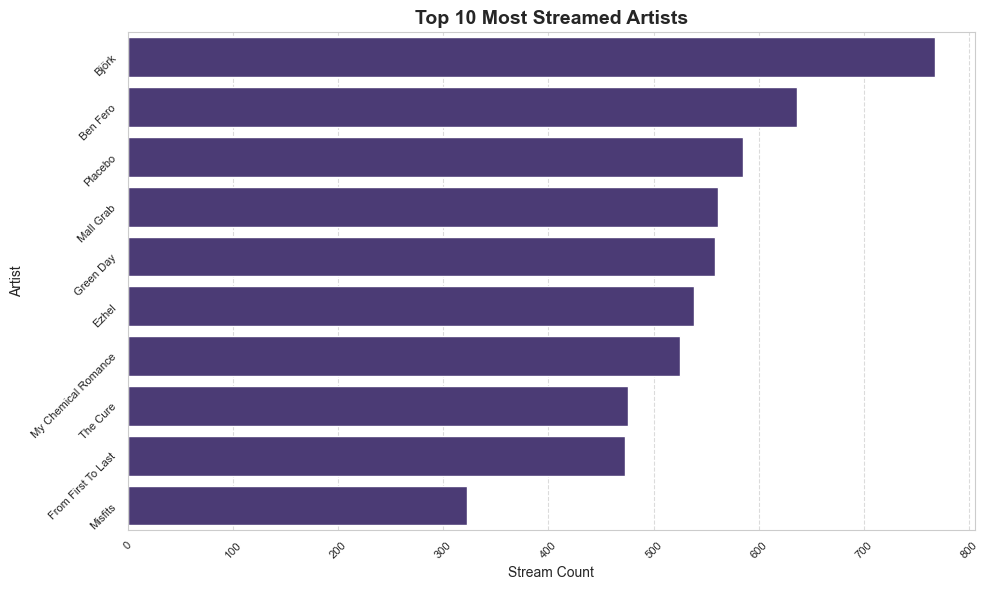

In [ ]:
plotting.barplot_streamcount(xlabel="artist")

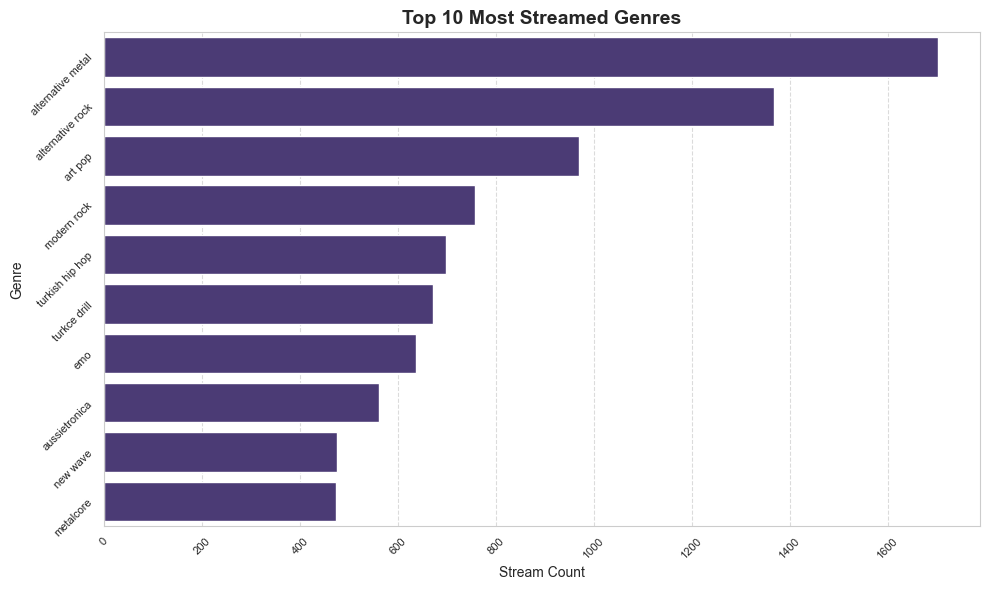

In [ ]:
plotting.barplot_streamcount(xlabel="genre")

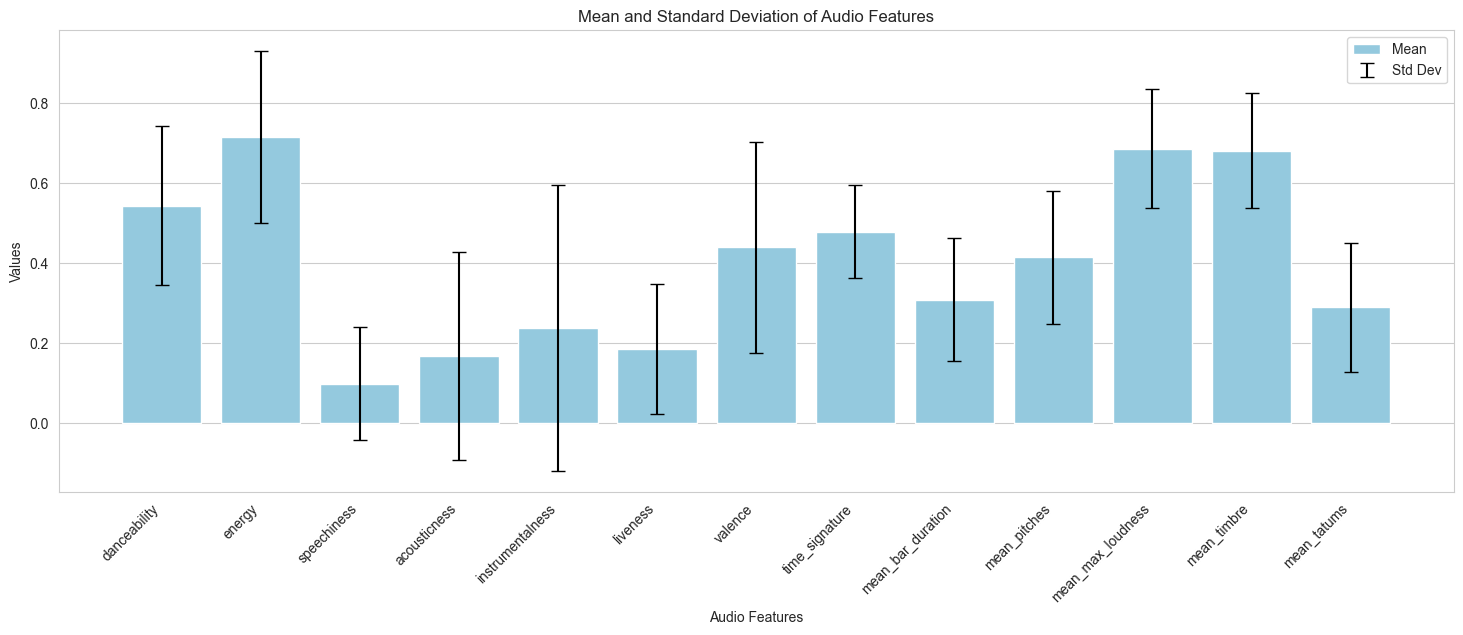

In [ ]:
plotting.plot_features()

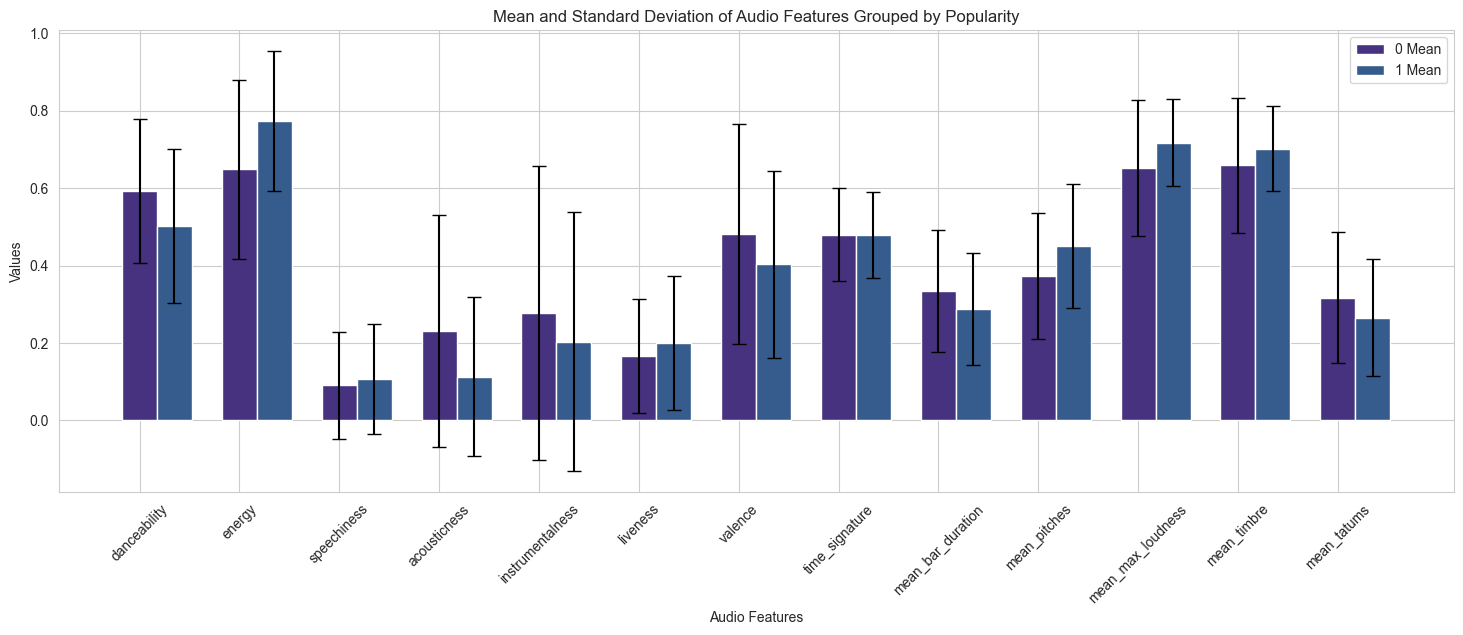

In [ ]:
plotting.plot_features(groupby='popularity')

Instantiate the classifier class to create our model

In [6]:
cls = spa.RunClassifier(df_audio)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


Voting Classifier:
Accuracy: 0.759493670886076
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.72        36
           1       0.75      0.84      0.79        43

    accuracy                           0.76        79
   macro avg       0.76      0.75      0.75        79
weighted avg       0.76      0.76      0.76        79



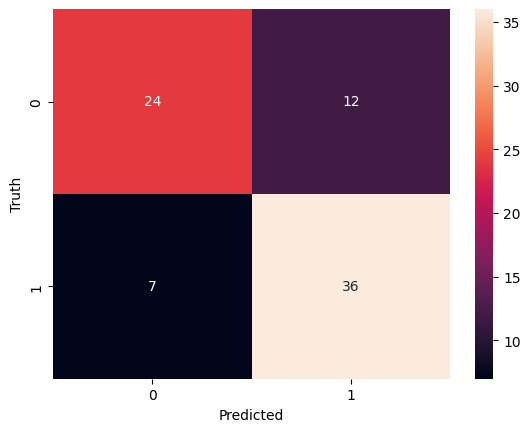

In [7]:
model = cls.create_model(max_iter=400)

In [ ]:
cls.save_model(model, 'spotify_mlp_model')

Model saved successfully.


Instantiate playlist class to create our playlist based on our model

In [8]:
playlist = spa.CreatePlaylist(sdata, model)

In [9]:
playlist.create_playlist(genre="alternative")

,track,artist,uri
0,Drive,Incubus,7nnWIPM5hwE3DaUBkvOIpy
1,One Last Breath,Creed,42T2QQv3xgBlpQxaSP7lnK
2,Seven Nation Army,The White Stripes,3dPQuX8Gs42Y7b454ybpMR
3,It's Been Awhile,Staind,25CMmGsl22APKhfuj4Tp7j
4,Somebody Told Me,The Killers,6PwjJ58I4t7Mae9xfZ9l9v
5,You Get Me So High,The Neighbourhood,7zwn1eykZtZ5LODrf7c0tS
6,The Kids Aren't Alright,The Offspring,4EchqUKQ3qAQuRNKmeIpnf
7,Break Stuff,Limp Bizkit,5cZqsjVs6MevCnAkasbEOX
8,Pumped Up Kicks,Foster The People,7w87IxuO7BDcJ3YUqCyMTT
9,Dragula,Rob Zombie,6Nm8h73ycDG2saCnZV8poF
